O que são Séries Temporais?

Uma série temporal é uma sequência de dados observados ao longo do tempo, geralmente em intervalos uniformes. Exemplos comuns incluem preços de ações, temperaturas diárias, vendas mensais e medições de tráfego na internet.

Artigo: https://medium.com/@nara.guimaraes/introdu%C3%A7%C3%A3o-%C3%A0s-s%C3%A9ries-temporais-ccf1aa740204

## Componentes de uma Série Temporal
Uma série temporal pode ser decomposta em três componentes principais:

Tendência (Trend): Reflete o movimento de longo prazo na série de dados.

Sazonalidade (Seasonality): Reflete padrões repetitivos ou ciclos em períodos específicos.

Ruído (Noise): Reflete as flutuações aleatórias que não podem ser explicadas pelos componentes de tendência e sazonalidade.



In [2]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Spock\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 329.3 kB/s eta 0:00:29
   -- ------------------------------------- 0.5/9.8 MB 329.3 kB/s eta 0:00:29
   -- ------------------------------------- 0.5/9.8 MB 329.3 kB/s eta 0:00:29
   --- ------------------------------------ 0.8/9.8 MB 409.3 kB/s eta 0:00:23
   ---- ----------------------------------- 1.0/9.8 MB 541.2 kB/s eta 0:00:17
   ----- ---------------------------------- 1.3/9.8 MB 621.6 kB/s eta 0:00:14
   ------- -------------------------------- 1.8/9.8 MB 768.8 kB/s eta 0:00:11
   -------- ------------------------------- 2.1/9.8 MB 804.5 kB/s eta 0:00:10
   -------- ------------------

C:\Users\Spock\AppData\Local\Temp\ipykernel_8848\2001272533.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='1/1/2010', periods=120, freq='M')


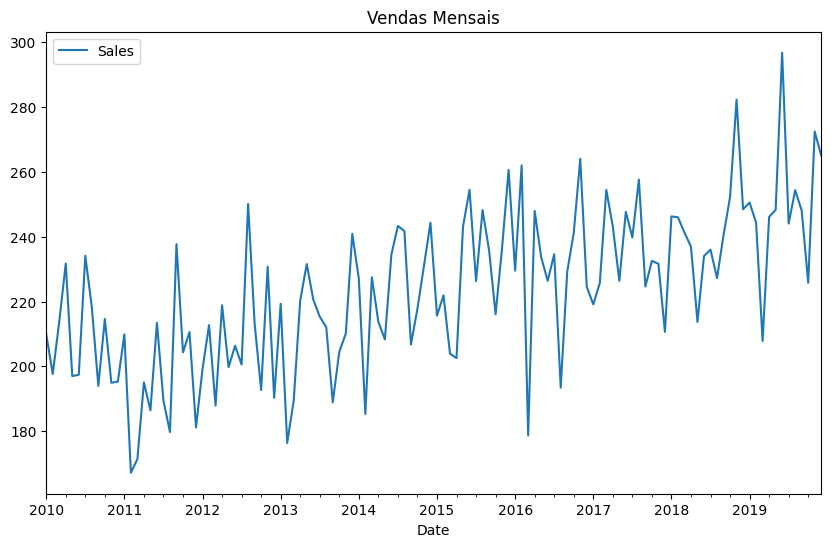

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Gerar dados de exemplo
np.random.seed(42)
date_range = pd.date_range(start='1/1/2010', periods=120, freq='M')
sales = np.random.normal(loc=200, scale=20, size=len(date_range)) + np.linspace(0, 50, len(date_range))

data = pd.DataFrame({'Date': date_range, 'Sales': sales})
#data
data.set_index('Date', inplace=True)

# Visualizar os dados
data.plot(figsize=(10, 6))
plt.title('Vendas Mensais')
plt.show()


## Análise de Componentes
Vamos decompor a série temporal em seus componentes usando a função seasonal_decompose da biblioteca statsmodels.

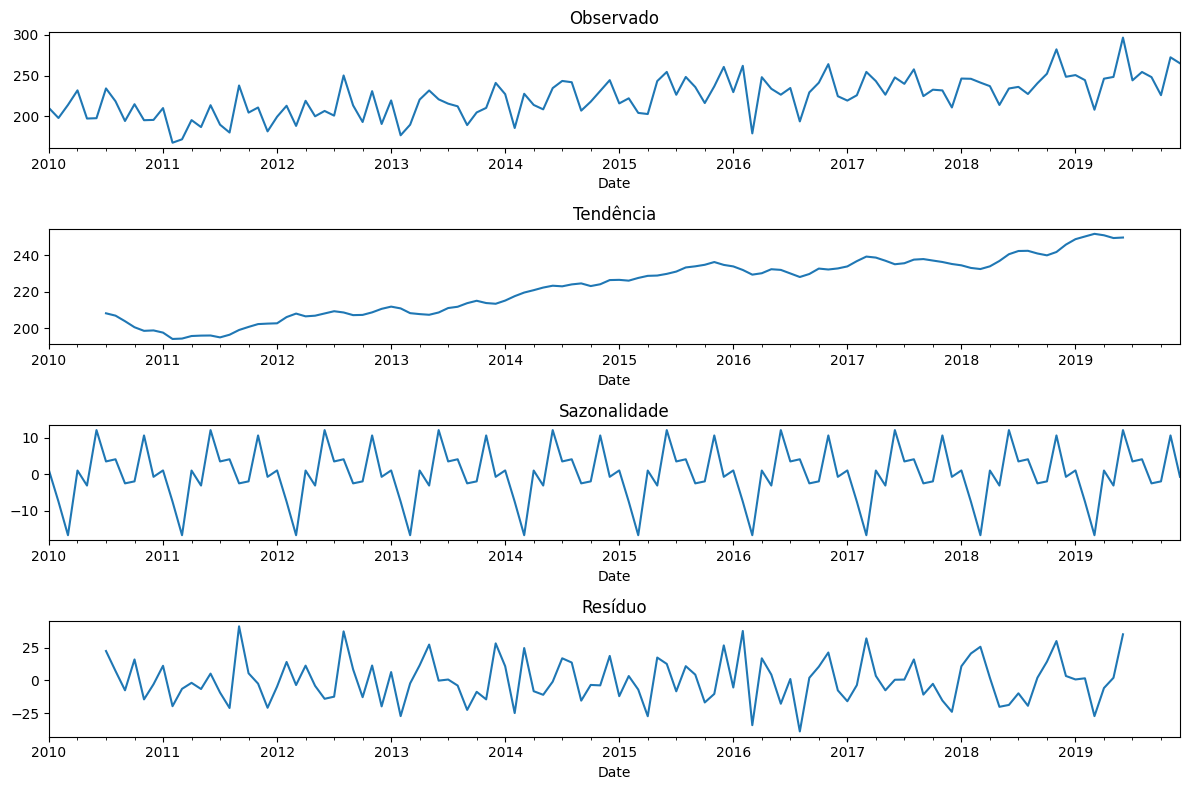

In [10]:
decomposition = seasonal_decompose(data['Sales'], model='additive')

# Plotar os componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observado')
decomposition.trend.plot(ax=ax2)
ax2.set_title('TendÃªncia')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Sazonalidade')
decomposition.resid.plot(ax=ax4)
ax4.set_title('ResÃ­duo')
plt.tight_layout()
plt.show()


**Interpretação dos Componentes**


**Observado:** A série temporal original.


**Tendência:** Mostra a direção geral dos dados ao longo do tempo.


**Sazonalidade:** Mostra padrões repetitivos em intervalos regulares.


**Resíduo:** Parte dos dados que não é explicada pela tendÃªncia nem pela sazonalidade, essencialmente o ruí­do.

## Séries Temporais Estacionárias
Uma Série temporal é estacionária se suas propriedades estatÃ­sticas, como média e variância, não mudam ao longo do tempo. Muitos métodos de anÃ¡lise e previsÃ£o de séries temporais assumem que os dados são estacionários.

**Teste de Estacionariedade**


Para verificar se uma sÃ©rie Ã© estacionÃ¡ria, podemos usar o teste de Dickey-Fuller aumentado (ADF).

In [11]:
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print(result)
    print('EstatÃ­stica ADF:', result[0])
    print('p-valor:', result[1])
    for key, value in result[4].items():
        print('CritÃ©rio', key, ':', value)


test_stationarity(data['Sales'])


(-0.6694650671862783, 0.8545010510795579, 6, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 936.2762167537209)
EstatÃ­stica ADF: -0.6694650671862783
p-valor: 0.8545010510795579
CritÃ©rio 1% : -3.489589552580676
CritÃ©rio 5% : -2.887477210140433
CritÃ©rio 10% : -2.580604145195395


**Entendendo os resultados**


O teste de Dickey-Fuller Aumentado (ADF) é um teste estatístico utilizado para determinar se uma série temporal é estacionária. Mais especificamente, ele testa a presença de uma raiz unitária na série temporal, que indica não estacionaridade. Vamos analisar cada um dos resultados do teste:

Estatística ADF: Este valor representa a estatística do teste calculada. Quanto mais negativo for este valor, mais forte é a evidência contra a hipótese nula (de que a série possui uma raiz unitária e, portanto, não é estacionária).

O valor da estatística ADF é -0.6694650671862783. Este valor não é suficientemente negativo para indicar que a série é estacionária.

p-valor: O p-valor indica a probabilidade de obter um resultado tão extremo quanto o observado, sob a hipótese nula. Um p-valor baixo (tipicamente menor que 0,05) sugere que a hipótese nula pode ser rejeitada, indicando que a série é estacionária.

O p-valor é 0.8545010510795579, que é muito maior que 0,05. Isso sugere que não temos evidência suficiente para rejeitar a hipótese nula de que a série possui uma raiz unitária e, portanto, não é estacionária.

Critérios (valores críticos em diferentes níveis de significância): Estes são os valores críticos da estatística do teste em diferentes níveis de significância (1%, 5% e 10%). Se a estatística ADF for menor (mais negativa) do que o valor crítico correspondente, a hipótese nula pode ser rejeitada.

A estatística ADF (-0.6694650671862783) é maior que todos os valores críticos (mais próximos de zero ou positivos), o que significa que não podemos rejeitar a hipótese nula em nenhum nível de significância comum.

## Tornando uma Série Estacionária
Se a série não for estacionária, podemos transformá-la aplicando diferenças (differencing).

In [12]:
test = data['Sales'].head(5)
test

Date
2010-01-31    209.934283
2010-02-28    197.654882
2010-03-31    213.794107
2010-04-30    231.721101
2010-05-31    196.997605
Name: Sales, dtype: float64

In [13]:
test_1 = data['Sales'].shift(1).head(5)
test_1

Date
2010-01-31           NaN
2010-02-28    209.934283
2010-03-31    197.654882
2010-04-30    213.794107
2010-05-31    231.721101
Name: Sales, dtype: float64

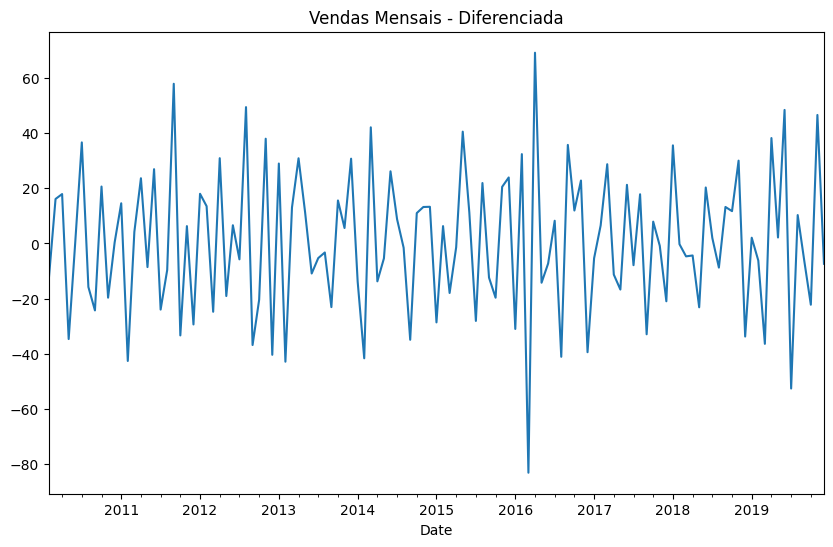

(-5.675505663324002, 8.723782679146082e-07, 9, 109, {'1%': -3.49181775886872, '5%': -2.8884437992971588, '10%': -2.5811201893779985}, 921.1103854118162)
EstatÃ­stica ADF: -5.675505663324002
p-valor: 8.723782679146082e-07
CritÃ©rio 1% : -3.49181775886872
CritÃ©rio 5% : -2.8884437992971588
CritÃ©rio 10% : -2.5811201893779985


In [14]:
data['Sales_diff'] = data['Sales'] - data['Sales'].shift(1)
data['Sales_diff'].dropna().plot(figsize=(10, 6))
plt.title('Vendas Mensais - Diferenciada')
plt.show()

# Teste de Estacionariedade na SÃ©rie Diferenciada
test_stationarity(data['Sales_diff'].dropna())


## Modelagem e Previsão
Uma vez que a série se torne estacionária, podemos aplicar modelos como o ARIMA (AutoRegressive Integrated Moving Average) para realizar previsões.

**Ajustando um Modelo ARIMA**

Vamos usar a biblioteca pmdarima para ajustar um modelo ARIMA automaticamente.

In [16]:
!pip install pmdarima

     â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 2.1/2.1 MB 7.0 MB/s eta 0:00:00


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(4, 1, 2)   Log Likelihood                -517.500
Date:                Mon, 17 Jun 2024   AIC                           1049.000
Time:                        11:27:03   BIC                           1068.454
Sample:                    01-31-2010   HQIC                          1056.900
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8408      0.193     -4.348      0.000      -1.220      -0.462
ar.L2         -0.1959      0.206     -0.949      0.342      -0.600       0.209
ar.L3         -0.2372      0.157     -1.512      0.1

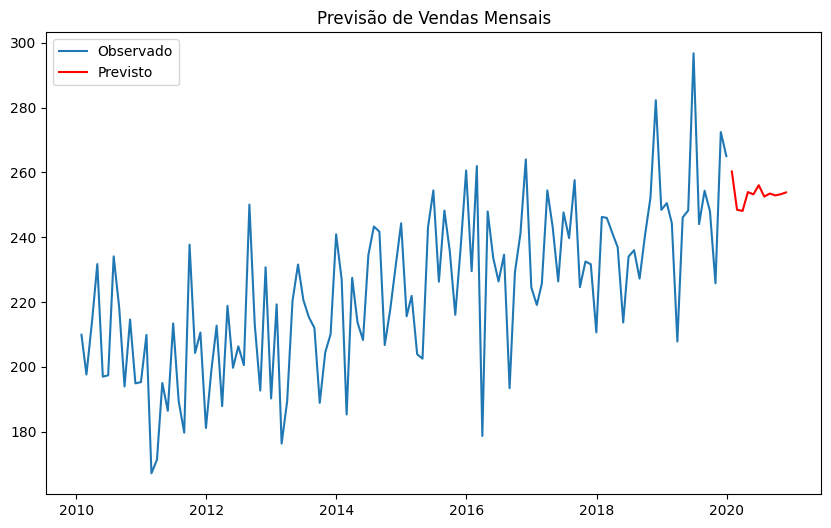

In [18]:
from pmdarima import auto_arima

# Ajustar o modelo ARIMA
model = auto_arima(data['Sales'], seasonal=True, m=12)
print(model.summary())

# Fazer previsÃµes
forecast = model.predict(n_periods=12)
forecast_index = pd.date_range(start=data.index[-1], periods=12, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)
# print(forecast)
# print(forecast_index)
# print(forecast_series)

# Plotar as previsÃµes
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Observado')
plt.plot(forecast_series, label='Previsto', color='red')
plt.legend()
plt.title('PrevisÃ£o de Vendas Mensais')
plt.show()
